En el presente trabajo se analizarán los datos del dataset Chocolate Sales.csv que he sacado de la página Kaggle. He elegido este dataset puesto que es relativamente simple en cuanto a interpretabilidad de las variables y está muy limpio, por lo que reducirá las tareas previas al análisis visual de los datos, que es lo realmente importante y del que considero que se pueden extraer unos insights potentes.

In [2]:
import pandas as pd

Realizo la lectura de los datos y muestro una primera visualización. Tenemos 6 variables:

**Sales Person**: Nombre del vendedor responsable de la transacción.

**Country**: Región de ventas o ubicación de la tienda donde tuvo lugar la transacción.

**Product**: Nombre del producto de chocolate vendido.

**Date**: La fecha de la transacción de la venta de chocolate.

**Amount**: Ingresos totales generados por la venta.

**Boxes shipped**: Número de cajas de chocolate enviadas en el pedido.
























































In [4]:
df = pd.read_csv('Chocolate Sales.csv')

In [6]:
df.head()

Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


Vemos que Amount sale como tipo objeto porque tiene un $. Voy a quitarlo para que sea tipo int, y pasaré también date a formato fecha. No tenemos nulos en el dataset lo cual es muy positivo

In [10]:
df['Amount'] = df['Amount'].str.replace('[\$,]', '', regex=True)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\pablo\AppData\Local\Temp\ipykernel_38184\4229683131.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Amount'] = df['Amount'].str.replace('[\$,]', '', regex=True)


In [12]:
df['Date']= pd.to_datetime(df['Date'], errors='coerce')

C:\Users\pablo\AppData\Local\Temp\ipykernel_38184\1852781647.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']= pd.to_datetime(df['Date'], errors='coerce')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   int64         
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 51.4+ KB


Una vez preparadas las variables, realizo un pequeño análisis exploratorio para tener un mejor entendimiento de los datos

In [16]:
df.describe()


Date        Amount  Boxes Shipped
count                           1094   1094.000000    1094.000000
mean   2022-05-03 09:04:56.160877568   5652.308044     161.797989
min              2022-01-03 00:00:00      7.000000       1.000000
25%              2022-03-02 00:00:00   2390.500000      70.000000
50%              2022-05-11 00:00:00   4868.500000     135.000000
75%              2022-07-04 00:00:00   8027.250000     228.750000
max              2022-08-31 00:00:00  22050.000000     709.000000
std                              NaN   4102.442014     121.544145

In [18]:
# Filtrar columnas object
obj_cols = df.select_dtypes(include='object').columns

# Recorrer columnas y mostrar desglose
for col in obj_cols:
    print(f'{"="*50}')
    print(f'Columna: {col}')
    print(f'Cardinalidad: {df[col].nunique()} valores únicos')
    print('Valores más frecuentes:')
    print(df[col].value_counts())  # Los 10 más frecuentes
    print('\n')

Columna: Sales Person
Cardinalidad: 25 valores únicos
Valores más frecuentes:
Sales Person
Kelci Walkden          54
Brien Boise            53
Van Tuxwell            51
Beverie Moffet         50
Dennison Crosswaite    49
Oby Sorrel             49
Ches Bonnell           48
Karlen McCaffrey       47
Gigi Bohling           47
Curtice Advani         46
Kaine Padly            45
Madelene Upcott        45
Marney O'Breen         45
Barr Faughny           43
Jehu Rudeforth         43
Roddy Speechley        43
Gunar Cockshoot        43
Mallorie Waber         41
Jan Morforth           39
Andria Kimpton         39
Husein Augar           38
Dotty Strutley         36
Wilone O'Kielt         34
Rafaelita Blaksland    34
Camilla Castle         32
Name: count, dtype: int64


Columna: Country
Cardinalidad: 6 valores únicos
Valores más frecuentes:
Country
Australia      205
India          184
USA            179
UK             178
Canada         175
New Zealand    173
Name: count, dtype: int64


Columna: 

**Series temporales**

En este primer apartado analizaré las distintas variables en función del aspecto temporal

C:\Users\pablo\anaconda3\Lib\site-packages\mizani\breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


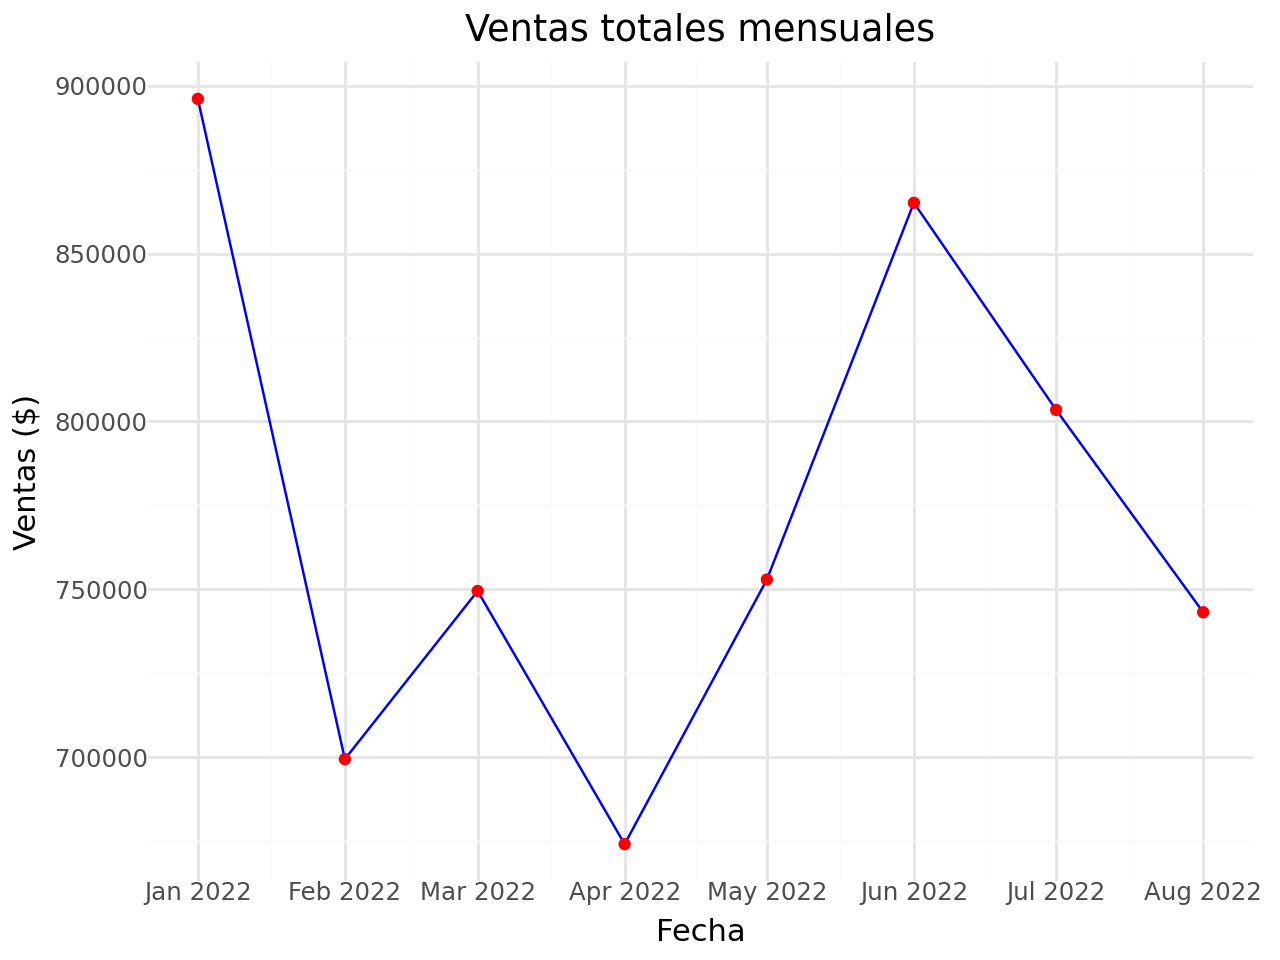

In [23]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, scale_x_datetime
import numpy as np

# Suponiendo que 'df' ya está cargado

# Agrupar datos por mes
df_time = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
df_time['Date'] = df_time['Date'].dt.to_timestamp()  # Convertir de Period a Timestamp

(ggplot(df_time, aes(x='Date', y='Amount')) +
  geom_line(color='blue') +
  geom_point(color='red') +
  labs(title='Ventas totales mensuales', x='Fecha', y='Ventas ($)') +
  scale_x_datetime(date_breaks='1 month', date_labels='%b %Y') +
  theme_minimal())

El primer gráfico muestra una serie temporal de las ventas mensuales. He agrupado todas las fechas por meses y calculado el total de ventas que hubo ese mes para mostrar la evolución. Enero es el mes con mas ventas, probablemente por el periodo estival, la Navidad, regalos, etc. Luego tenemos un descenso y un nuevo pico en junio, que puede coincidir con el inicio del verano, final de clases, etc.

In [31]:
import dash
from dash import dcc, html
import plotly.express as px


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Dashboard de Ventas de Chocolate"),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': c, 'value': c} for c in df['Country'].unique()],
        value=df['Country'].unique()[0],
        multi=False
    ),
    dcc.Graph(id='ventas-tiempo')
])

@app.callback(
    dash.dependencies.Output('ventas-tiempo', 'figure'),
    [dash.dependencies.Input('country-dropdown', 'value')]
)
def update_graph(selected_country):
    filtered = df[df['Country'] == selected_country].copy()
    
    # Agrupar por mes correctamente
    filtered['Month'] = filtered['Date'].dt.to_period('M')
    time_data = (
        filtered.groupby('Month')['Amount']
        .sum()
        .reset_index()
    )
    time_data['Month'] = time_data['Month'].dt.to_timestamp()

    fig = px.line(
        time_data,
        x='Month',
        y='Amount',
        title=f'Ventas mensuales en {selected_country}',
        markers=True
    )
    fig.update_layout(xaxis_title="Fecha", yaxis_title="Ventas ($)")
    return fig

if __name__ == '__main__':
    app.run(debug=True, port= 8051)




En esta ocasión he usado la libería dash, para hacer un dashboard de las ventas mensuales más complejo que permite ver su evolución por países utilizando el desplegable, gracias al cual podemos ver diferencias entre ellos.

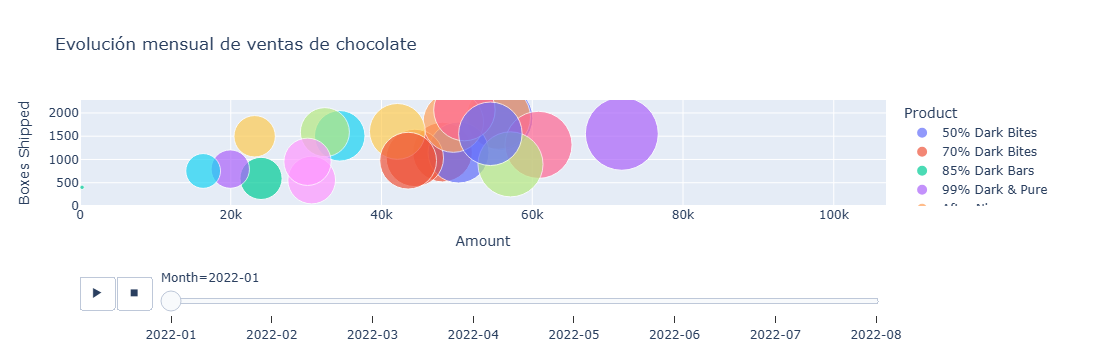

In [35]:
df['Month'] = df['Date'].dt.to_period('M').astype(str)  # Ejemplo: '2022-01'

# (Opcional) Agrupar para sumar ventas por país, producto y mes
agg = df.groupby(['Month', 'Product']).agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
}).reset_index()

# Gráfico animado
fig = px.scatter(
    agg,
    x="Amount",
    y="Boxes Shipped",
    animation_frame="Month",
    size="Amount",
    color="Product",
    size_max=60,
    range_x=[0, agg['Amount'].max()*1.1],
    range_y=[0, agg['Boxes Shipped'].max()*1.1],
    title="Evolución mensual de ventas de chocolate"
)
fig.show()

Por último he utilizado este gráfico interactivo de plotly para ver la evolución temporal de las ventas de cada tipo de producto. El tamaño del círculo es mayor cuanto más es el amount vendido y está mas a la derecha. El eje y representa las cajas enviadas. Se puede ver qué producto triunfó más en cada mes y puede servir a las empresas para saber qué funciona mejor en cada momento.

En este segundo apartado haré un análisis teniendo en cuenta otra variables diferentes al tiempo, como los países, los sales person o los productos

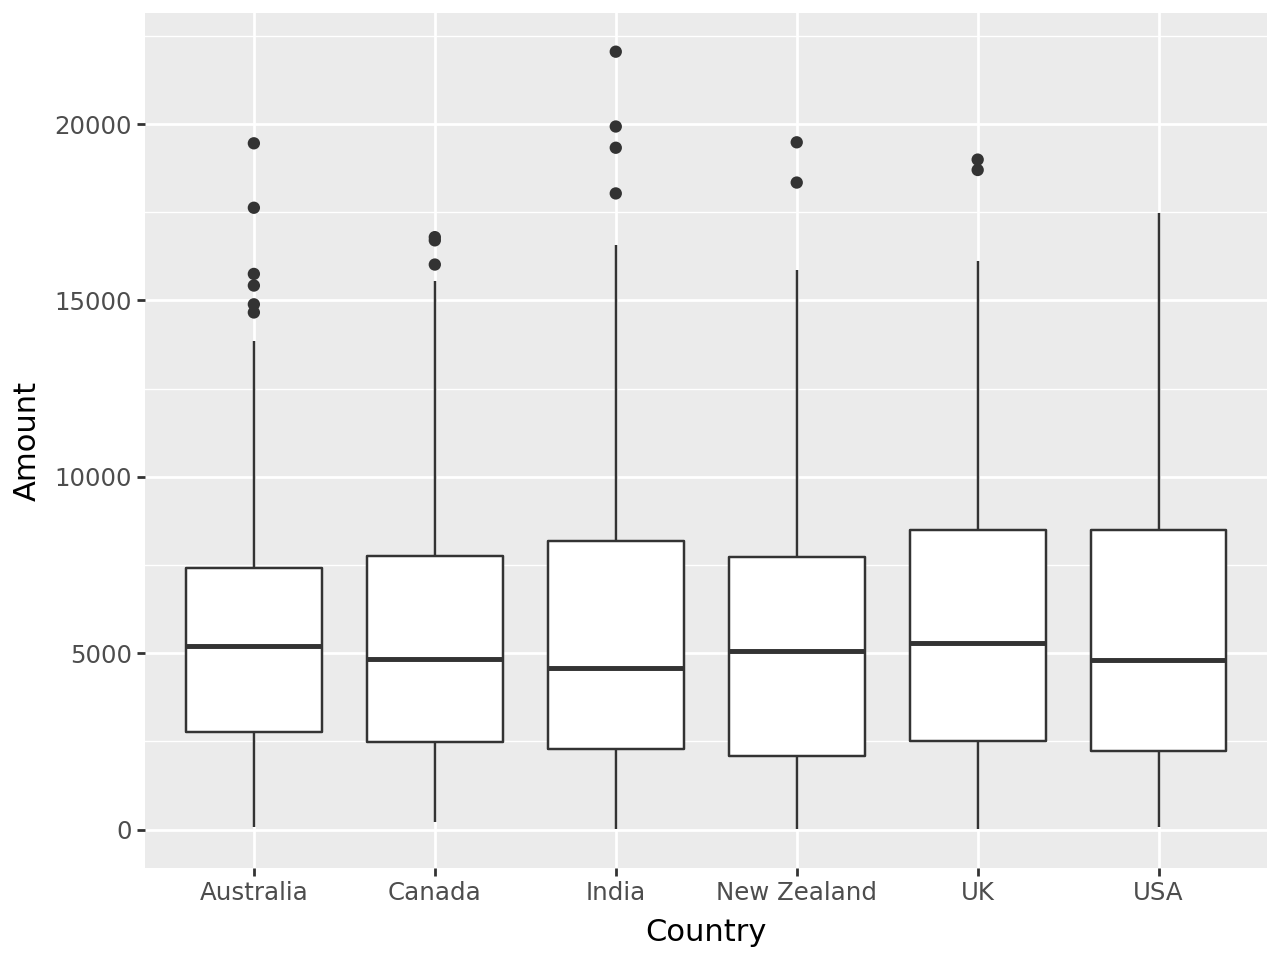

In [42]:
from plotnine import ggplot, aes, geom_line, geom_point, geom_boxplot, labs, theme_minimal, coord_flip

(
    ggplot(df)
    + aes( x = "Country",
         y = "Amount")
    + geom_boxplot()
     
#    + theme_classic()
    
)

En este gráfico, simple pero informativo, vemos que los 6 países (con pequeñas diferencias) venden (en $) cantidades parecidas, ya que sus medianas están todas en torno al 5000

In [45]:
df_grouped = df.groupby(['Country', 'Product'], as_index=False).agg({
    'Amount': 'sum',
    'Boxes Shipped': 'mean'  # o 'mean', según lo que tenga sentido
})
df_grouped

Country              Product  Amount  Boxes Shipped
0    Australia       50% Dark Bites   89222     198.875000
1    Australia       70% Dark Bites   39354     233.666667
2    Australia        85% Dark Bars   38479     150.000000
3    Australia      99% Dark & Pure   54908     122.727273
4    Australia          After Nines   27769     130.285714
..         ...                  ...     ...            ...
127        USA  Peanut Butter Cubes   33628     172.714286
128        USA      Raspberry Choco   83524     136.090909
129        USA   Smooth Sliky Salty   45493     165.000000
130        USA  Spicy Special Slims   25214     173.125000
131        USA           White Choc   67221     120.400000

[132 rows x 4 columns]

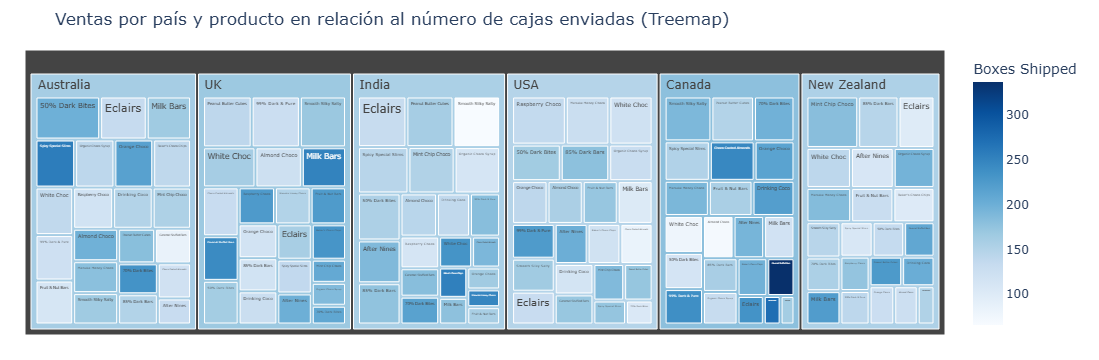

In [47]:


fig = px.treemap(
    df_grouped,
    path=['Country', 'Product'],
    values='Amount',
    color='Boxes Shipped',  # ← escala de color basada en Amount
    color_continuous_scale='Blues',  # o 'Viridis', 'RdBu', 'YlGnBu', etc.
    title='Ventas por país y producto en relación al número de cajas enviadas (Treemap)'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))  # más limpio
fig.show()


Este gráfico es un treemap muy interesante. Lo que he hecho ha sido agrupar por país y por producto, y calcular la suma de amount y la media de cajas enviadas. El treemap tiene a los 6 países y dentro todos los productos. Mientras más grande es la caja, mayor es el amount vendido de ese producto en ese país, y mientras más oscuro mayor es el número medio de cajas enviadas. La caja más grande es 50% Dark Bites en Australia, pero no es de la que más cajas se enviaron (Caramel stuffed bars en India)

<Figure size 1800x800 with 0 Axes>

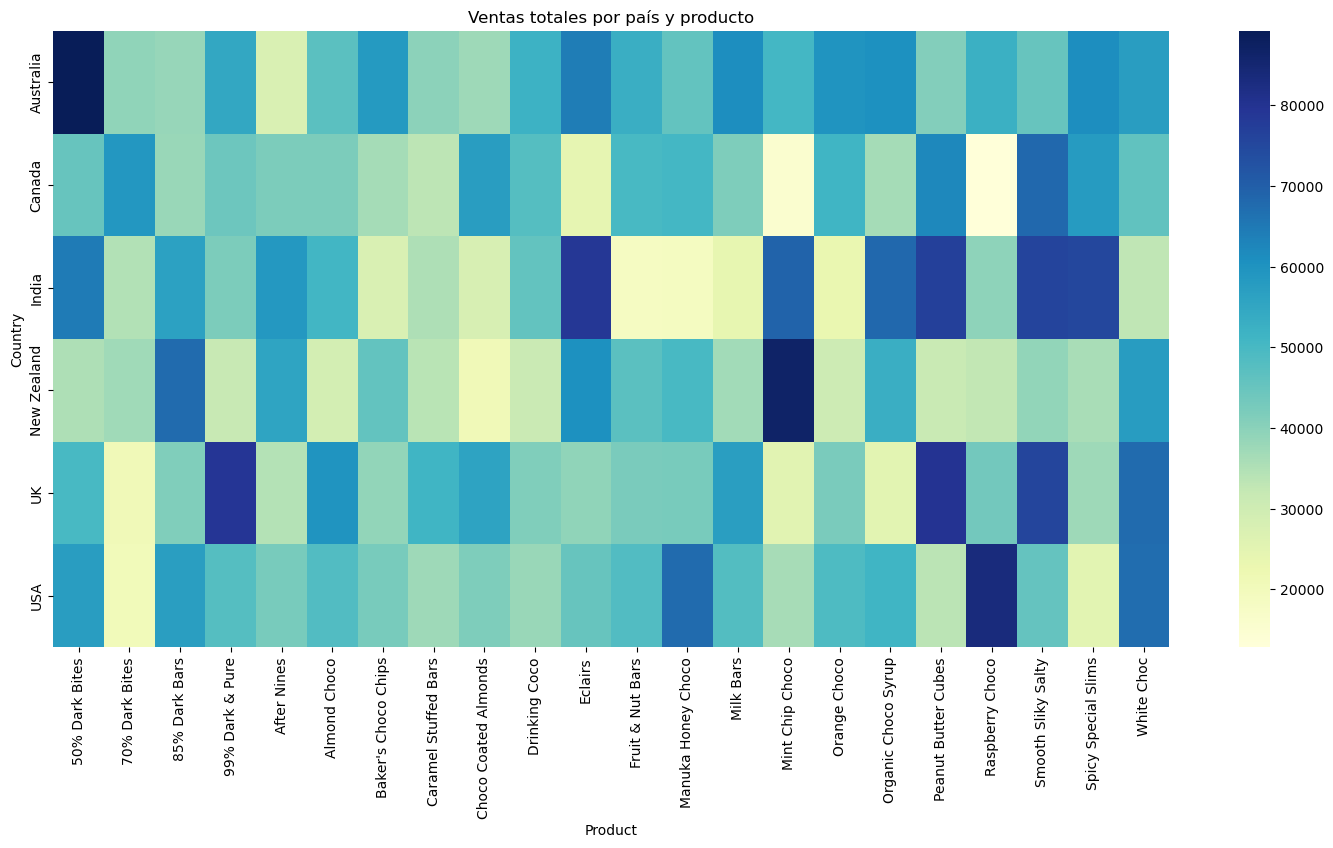

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
# Tabla dinámica
pivot = df.pivot_table(values='Amount', index='Country', columns='Product', aggfunc='sum', fill_value=0)

plt.figure(figsize=(18,8))
sns.heatmap(pivot, annot=False, cmap='YlGnBu')
plt.title('Ventas totales por país y producto')
plt.show()


Otra forma parecida de representarla es este heatmap, que es una forma visualmente fácil de identificar cuáles han sido los productos más vendido y en qué países

In [58]:
df_grouped2 = df.groupby(['Country', 'Sales Person'], as_index=False).agg({
    'Boxes Shipped': ['sum', 'mean']
})
df_grouped2.columns = ['Country', 'Sales Person', 'Boxes_Sum', 'Boxes_Mean']
df_grouped2

Country         Sales Person  Boxes_Sum  Boxes_Mean
0    Australia       Andria Kimpton       1317  188.142857
1    Australia         Barr Faughny        657  109.500000
2    Australia       Beverie Moffet       2209  276.125000
3    Australia          Brien Boise       1442  131.090909
4    Australia       Camilla Castle       1073  153.285714
..         ...                  ...        ...         ...
145        USA           Oby Sorrel       1045  149.285714
146        USA  Rafaelita Blaksland        534  106.800000
147        USA      Roddy Speechley       1494  186.750000
148        USA          Van Tuxwell        788  131.333333
149        USA       Wilone O'Kielt        482   68.857143

[150 rows x 4 columns]

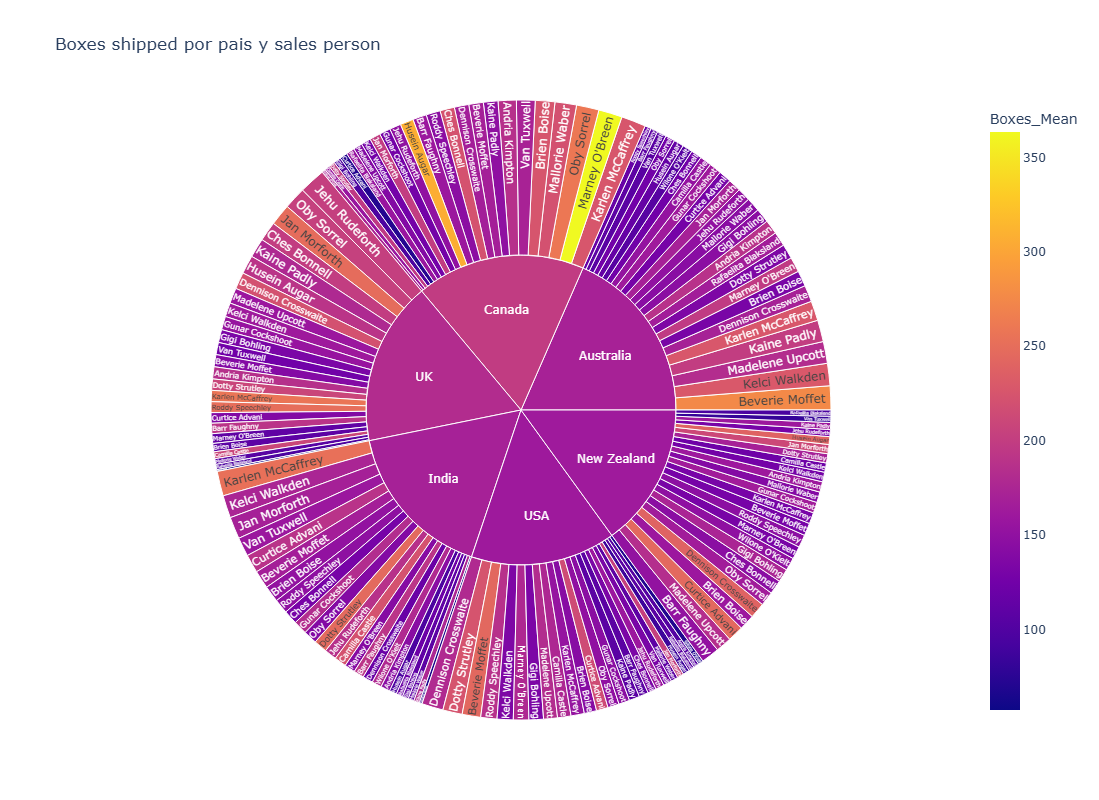

In [60]:
fig = px.sunburst(df_grouped2, 
                  title=("Boxes shipped por pais y sales person"),
                  height=800,
                  width=800,
                  path=['Country', 
                        'Sales Person'], 
                  values='Boxes_Sum',
                  color='Boxes_Mean')
fig.show()

Por último, he hecho un gráfico sunburst, tras agrupar por país y sales person y calculado el total de cajas enviadas y la media. Las "tiras" más grandes son los sales person/países con mayor número de cajas enviadas y los más claritos los que más media de cajas han enviado.

En este último apartado he hecho un mapa con la librería folium

In [64]:
country_mapping = {
    'USA': 'United States of America',
    'UK': 'United Kingdom'
    # Puedes añadir más si es necesario
}

# Aplicar el mapeo
df['Country'] = df['Country'].replace(country_mapping)

# Agrupar ventas totales por país (ya mapeados)
ventas_pais = df.groupby('Country')['Amount'].sum().reset_index()
ventas_pais

Country   Amount
0                 Australia  1137367
1                    Canada   962899
2                     India  1045800
3               New Zealand   950418
4            United Kingdom  1051792
5  United States of America  1035349

In [68]:
import requests

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
geojson_countries = requests.get(url).json()

In [70]:
# Crear un diccionario con ventas por país
ventas_dict = ventas_pais.set_index('Country')['Amount'].to_dict()

# Añadir la venta total a cada feature del geojson
for feature in geojson_countries['features']:
    country_name = feature['properties']['name']
    feature['properties']['Amount'] = ventas_dict.get(country_name, 0)


In [72]:
import folium

# Centrar el mapa en el mundo
m = folium.Map(location=[20, 0], zoom_start=2)

# Añadir la capa coroplética
folium.Choropleth(
    geo_data=geojson_countries,
    data=ventas_pais,
    columns=['Country', 'Amount'],
    key_on='feature.properties.name',   # Este campo depende del GeoJSON que uses
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Ventas totales de chocolate ($)',
    nan_fill_color='white'
).add_to(m)

# Mostrar el mapa (en Jupyter) o guardarlo en HTML
m.save('ventas_chocolate_mundo.html')

In [76]:
folium.GeoJson(
    geojson_countries,
    name="Países",
    tooltip=folium.GeoJsonTooltip(
        fields=["name","Amount"],
        aliases=["País:","Ventas totales: "],
        localize=True
    ),
    style_function=lambda feature: {
        'fillColor': 'transparent',
        'color': 'black',  # Borde negro (puedes quitarlo si quieres)
        'weight': 1,
        'fillOpacity': 0
    }
).add_to(m)


In [78]:
m

Aunque solo tengamos datos de 6 países, creo que es muy visual poder ver en un mapa, en una escala de colores, cuáles son los países con mayores ventas de chocolate. Al hacer hover además vemos el nombre de país y su amount
